# Calculating the Most Cost-Effective Alcohols at Mercadona

In this "scientific endeavor," we aim to determine the best value for your money when planning a night out with selections from Mercadona.

## Data Collection

Harnessing the power of `mercapy`, data was extracted from Mercadona's API. To ensure working with more or less clean data, we opted for the "mad1" warehouse located in Madrid instead of sampling from all the warehouses across Spain. This particular warehouse offers a diverse selection of 236 alcoholic beverages, including beer, spirits, and wine. Cheers to data-driven decisions!


In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df = pd.read_csv("data/mad1.csv", encoding="utf-8")
df.head(5)

,id,warehouse,language,ean,name,slug,legal_name,unit_price,bulk_price,is_discounted,...,is_new,is_pack,pack_size,description,minimum_amount,weight,brand,origin,supplier,category
0,4240.0,mad1,es,9905000042405,"Aceite de oliva 0,4º Hacendado",aceite-oliva-04o-hacendado-botella,HACENDADO ACEITE DE OLIVA,8.00,8.00,False,...,False,False,NaN,"Aceite de oliva 0,4º Hacendado",1,1.00,Hacendado,España,Aceites Abril S.L.,"Aceite, vinagre y sal"
1,4717.0,mad1,es,9904000047175,Aceite de oliva virgen extra Hacendado,aceite-oliva-virgen-extra-hacendado-garrafa,Aceite De Oliva Virgen Extra,29.55,9.85,False,...,False,False,NaN,Aceite de oliva virgen extra Hacendado,1,3.00,Hacendado,"Puente de Génave, Sierra de Segura. Jaén.",ACEITES MAEVA S.L.U,"Aceite, vinagre y sal"
2,4740.0,mad1,es,9904000047403,Aceite de oliva virgen extra Hacendado,aceite-oliva-virgen-extra-hacendado-botella,ACEITE DE OLIVA VIRGEN EXTRA,9.90,9.90,False,...,False,False,NaN,Aceite de oliva virgen extra Hacendado,1,1.00,Hacendado,Jaén,ACEITES MAEVA S.L.U,"Aceite, vinagre y sal"
3,4706.0,mad1,es,8480000047069,Aceite de oliva virgen extra Hacendado Gran Se...,aceite-oliva-virgen-extra-hacendado-gran-selec...,Aceite de Oliva Virgen Extra,8.10,10.80,False,...,False,False,NaN,Aceite de oliva virgen extra Hacendado Gran Se...,1,0.75,Hacendado,España,Oleoestepa S.C.A.,"Aceite, vinagre y sal"
4,4640.0,mad1,es,9905000046403,Aceite de oliva 1º Hacendado,aceite-oliva-1o-hacendado-botella,HACENDADO ACEITE DE OLIVA,8.00,8.00,False,...,False,False,NaN,Aceite de oliva 1º Hacendado,1,1.00,Hacendado,España,Aceites Abril S.L.,"Aceite, vinagre y sal"


## Data Cleaning

Before diving into the analysis, we need to clean up the data:

1. Get all products for +18 y.o.
2. Substitute 0% alcohol drinks (which appear as NaN) with 0.
2. Exclude discounted products to ensure consistent pricing analysis.


In [43]:
df = df[df["age_check"]]
df['alcohol_by_volume'] = df["alcohol_by_volume"].fillna(0)
df = df[~df["is_discounted"]]

## Calculations

To ensure an optimal night out, we need to calculate some key metrics for each item. Here's how we do it:

1. **Calculating Alcohol per Liter**:
   - This calculation determines the amount of pure alcohol in liters for each item.
   - It takes the alcohol by volume (ABV) percentage, divides it by 100 to convert it into a fraction, and then multiplies this fraction by the weight of the item in liters.
   - **Formula**: \((\text{ABV} / 100) \times \text{weight}\)

2. **Calculating Alcohol per Euro**:
   - This calculation determines the amount of pure alcohol you get per euro spent.
   - It divides the previously calculated alcohol per liter by the unit price of the item.
   - **Formula**: \(\text{alcohol per liter} / \text{unit price}\)


In [44]:
df["alcohol_per_liter"] = (df["alcohol_by_volume"]/100) * df["weight"]
df["alcohol_per_euro"] = df["alcohol_per_liter"] / df["unit_price"]

df = df.sort_values(by="alcohol_per_euro", ascending=False).nlargest(
    7, "alcohol_per_euro"
)

df.drop(columns=["legal_name", "previous_price", "supplier", "age_check", "origin", "is_discounted", "is_new", "is_pack", "pack_size", "slug", "ean", "warehouse"])

,id,language,name,unit_price,bulk_price,iva,alcohol_by_volume,description,minimum_amount,weight,brand,category,alcohol_per_liter,alcohol_per_euro
1061,66211.0,es,Vino tinto Casón Histórico,1.05,1.05,21,13.0,Vino tinto Casón Histórico,1,1.0,Casón Histórico,Vino tinto,0.13,0.123810
1023,66127.0,es,Vino blanco Casón Histórico,0.90,0.90,21,11.0,Vino blanco Casón Histórico,1,1.0,Casón Histórico,Vino blanco,0.11,0.122222
1065,66960.0,es,Vino tinto Masía de Altigón,5.55,1.11,21,13.0,Vino tinto Masía de Altigón,1,5.0,Masía de Altigón,Vino tinto,0.65,0.117117
1066,37804.0,es,Vino tinto Hacienda Zargón,5.55,1.11,21,13.0,Vino tinto Hacienda Zargón,1,5.0,Hacienda Zargón,Vino tinto,0.65,0.117117
1059,37802.0,es,Vino rosado Dominio de Borgia,2.40,1.20,21,13.5,Vino rosado Dominio de Borgia,1,2.0,Dominio de Borgia,Vino rosado,0.27,0.112500
1064,37808.0,es,Vino tinto Dominio de Borgia,2.70,1.35,21,13.5,Vino tinto Dominio de Borgia,1,2.0,Dominio de Borgia,Vino tinto,0.27,0.100000
1062,66107.0,es,Vino tinto Don Simón,1.60,1.60,21,12.0,Vino tinto Don Simón,1,1.0,Don Simón,Vino tinto,0.12,0.075000


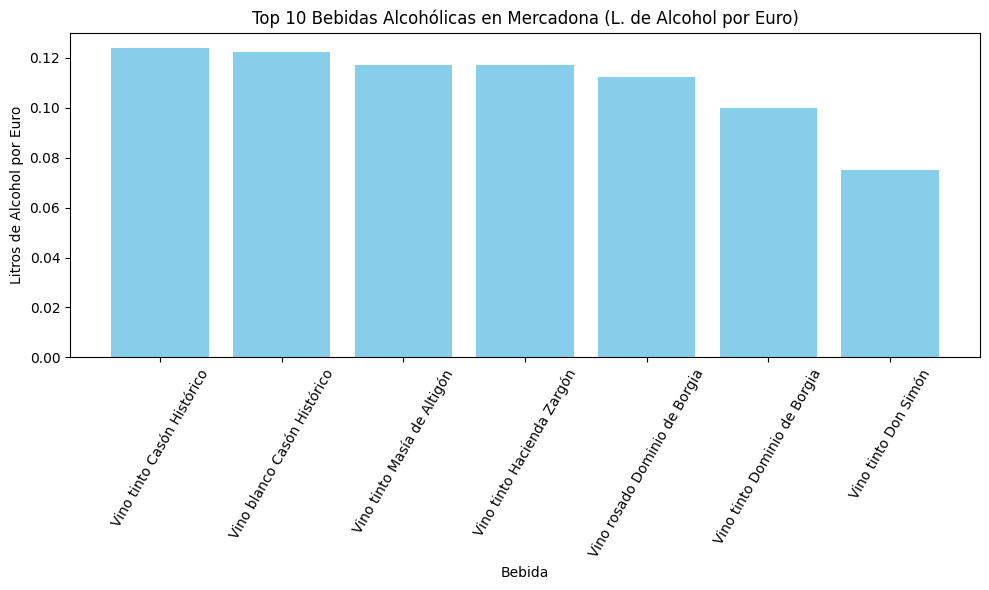

In [45]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(df["name"], df["alcohol_per_euro"], color="skyblue")
plt.title("Top 10 Bebidas Alcohólicas en Mercadona (L. de Alcohol por Euro)")
plt.xlabel("Bebida")
plt.ylabel("Litros de Alcohol por Euro")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()